# Pre-treatment

In [127]:
import os
import cv2
from matplotlib import pyplot as plt
from typing import Tuple, Generator
import numpy as np
from skimage import io, util
from skimage.feature import hog

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [71]:
# concatenate all csv files into one
with open('data/labels.csv', 'w') as outfile:
    for file in os.listdir('data/labels_csv'):
        with open('data/labels_csv/' + file) as infile:
            # add filename to each line
            for line in infile:
                outfile.write(file[:-4] + ',' + line)

In [125]:
def get_ecocup_info(difficult: bool) -> Generator[Tuple[str, int, int, int, int], None, None]:
    with open("data/labels.csv") as file:
        line = file.readline()
        while line:
            if difficult or line.split(',')[-1] == '0\n':
                yield line.split(',')[:-1]
            else:
                print('skipping difficult image')
            line = file.readline()

# returns a cv2 image
def ecocup_image(image_file: str, x: int, y: int, w: int, h: int) -> np.ndarray:
    return cv2.imread('data/images/pos/' + image_file + '.jpg')[int(x):int(x) + int(w), int(y):int(y) + int(h)]

def get_pos_images(difficult=False) -> Generator[np.ndarray, None, None]:
    # generate positive images (ecocups)
    for info in get_ecocup_info(difficult):
        yield resize_image(ecocup_image(*info), (100, 200))

def resize_image(source: np.ndarray, size: Tuple[int, int]) -> np.ndarray:
    return cv2.resize(source, size)

def hog_image(image: np.ndarray) -> np.ndarray:
    # image to greyscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return hog(image,visualize=True)

skipping difficult image
skipping difficult image


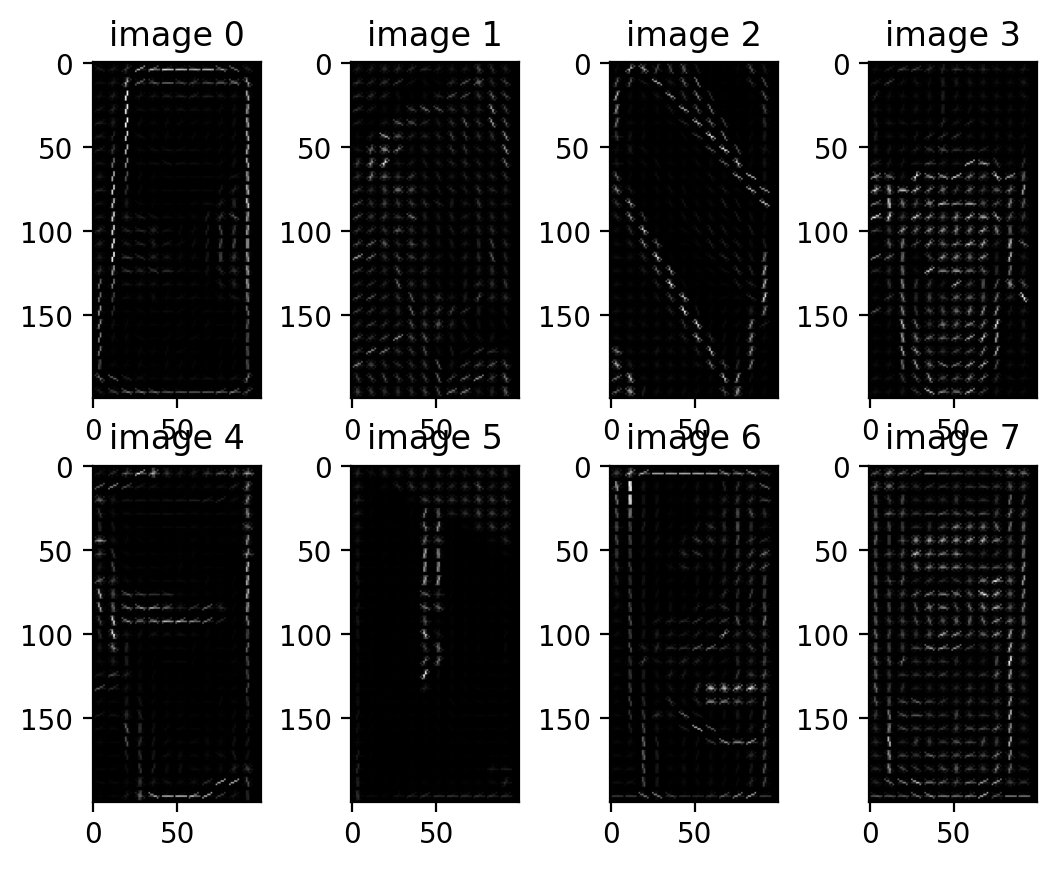

In [128]:
# show 8 images
fig, axs = plt.subplots(2, 4)
gen = get_pos_images()
for i, ax in enumerate(axs.flat):
    fd, computed_hog = hog_image(next(gen))
    ax.imshow(computed_hog, cmap='gray')
    ax.set_title('image ' + str(i))